In [1]:
import pandas as pd
import numpy as np

In [2]:
train_istanbul_data_mean_sdsh = np.array(pd.read_csv('data/istanbul/istanbul_data_mean_sdsh.csv')['NUMBER_OF_VEHICLES'])[169:-3500]
train_ar_istanbul_data_mean_sdsh = np.array(pd.read_csv("point_forecasts/ar_istanbul_data_mean_sdsh_train.csv")["0"])
train_arma_istanbul_data_mean_sdsh = np.array(pd.read_csv("point_forecasts/arma_istanbul_data_mean_sdsh_train.csv")["0"])
train_arima_istanbul_data_mean_sdsh = np.array(pd.read_csv("point_forecasts/arima_istanbul_data_mean_sdsh_train.csv")["0"])
train_sarima_istanbul_data_mean_sdsh = np.array(pd.read_csv("point_forecasts/sarima_istanbul_data_mean_sdsh_train.csv")["0"])
train_slstm_istanbul_data_mean_sdsh = np.array(pd.read_csv("point_forecasts/slstm_istanbul_data_mean_sdsh_train.csv")["0"])
train_ssvr_istanbul_data_mean_sdsh = np.array(pd.read_csv("point_forecasts/ssvr_istanbul_data_mean_sdsh_train.csv")["0"])
train_sxgboost_istanbul_data_mean_sdsh = np.array(pd.read_csv("point_forecasts/sxgboost_istanbul_data_mean_sdsh_train.csv")["0"])

In [3]:
test_istanbul_data_mean_sdsh = np.array(pd.read_csv('data/istanbul/istanbul_data_mean_sdsh.csv')['NUMBER_OF_VEHICLES'][-3500:])
test_ar_istanbul_data_mean_sdsh = np.array(pd.read_csv("point_forecasts/ar_istanbul_data_mean_sdsh_test.csv")["0"])
test_arma_istanbul_data_mean_sdsh = np.array(pd.read_csv("point_forecasts/arma_istanbul_data_mean_sdsh_test.csv")["0"])
test_arima_istanbul_data_mean_sdsh = np.array(pd.read_csv("point_forecasts/arima_istanbul_data_mean_sdsh_test.csv")["0"])
test_sarima_istanbul_data_mean_sdsh = np.array(pd.read_csv("point_forecasts/sarima_istanbul_data_mean_sdsh_test.csv")["0"])
test_slstm_istanbul_data_mean_sdsh = np.array(pd.read_csv("point_forecasts/slstm_istanbul_data_mean_sdsh_test.csv")["0"])
test_ssvr_istanbul_data_mean_sdsh = np.array(pd.read_csv("point_forecasts/ssvr_istanbul_data_mean_sdsh_test.csv")["0"])
test_sxgboost_istanbul_data_mean_sdsh = np.array(pd.read_csv("point_forecasts/sxgboost_istanbul_data_mean_sdsh_test.csv")["0"])
test_slstmarima_istanbul_data_mean_sdsh = np.array(pd.read_csv("point_forecasts/slstmarima_istanbul_data_mean_sdsh_test.csv")["0"])
test_ssvrarima_istanbul_data_mean_sdsh = np.array(pd.read_csv("point_forecasts/ssvrarima_istanbul_data_mean_sdsh_test.csv")["0"])
test_sxgboostarima_istanbul_data_mean_sdsh = np.array(pd.read_csv("point_forecasts/sxgboostarima_istanbul_data_mean_sdsh_test.csv")["0"])

# Historical PI

In [4]:
test_size = 3500

In [5]:
residuals_ar = np.array(test_istanbul_data_mean_sdsh).reshape((test_size,1)) - np.array(test_ar_istanbul_data_mean_sdsh).reshape((test_size,1))
residuals_arma = np.array(test_istanbul_data_mean_sdsh).reshape((test_size,1)) - np.array(test_arma_istanbul_data_mean_sdsh).reshape((test_size,1))
residuals_arima = np.array(test_istanbul_data_mean_sdsh).reshape((test_size,1)) - np.array(test_arima_istanbul_data_mean_sdsh).reshape((test_size,1))
residuals_sarima = np.array(test_istanbul_data_mean_sdsh).reshape((test_size,1)) - np.array(test_sarima_istanbul_data_mean_sdsh).reshape((test_size,1))
residuals_slstm = np.array(test_istanbul_data_mean_sdsh).reshape((test_size,1)) - np.array(test_slstm_istanbul_data_mean_sdsh).reshape((test_size,1))
residuals_ssvr = np.array(test_istanbul_data_mean_sdsh).reshape((test_size,1)) - np.array(test_ssvr_istanbul_data_mean_sdsh).reshape((test_size,1))
residuals_sxgboost = np.array(test_istanbul_data_mean_sdsh).reshape((test_size,1)) - np.array(test_sxgboost_istanbul_data_mean_sdsh).reshape((test_size,1))
residuals_slstmarima = np.array(test_istanbul_data_mean_sdsh).reshape((test_size,1)) - np.array(test_slstmarima_istanbul_data_mean_sdsh).reshape((test_size,1))
residuals_ssvrarima = np.array(test_istanbul_data_mean_sdsh).reshape((test_size,1)) - np.array(test_ssvrarima_istanbul_data_mean_sdsh).reshape((test_size,1))
residuals_sxgboostarima = np.array(test_istanbul_data_mean_sdsh).reshape((test_size,1)) - np.array(test_sxgboostarima_istanbul_data_mean_sdsh).reshape((test_size,1))

In [7]:
residuals_sxgboostarima.shape

(3500, 1)

In [8]:
def get_corridor(corridor_size, error_series):
    corridor = []
    length = len(error_series) - corridor_size
    for i in range(length):
        errors_in_corridor = error_series[i:i+corridor_size]
        ordered_errors_in_corridor = np.sort(errors_in_corridor, axis=0)
        corridor.append({"OrderedErrors": ordered_errors_in_corridor})
    return corridor

In [9]:
corridor_size = 21
corridor_ar = get_corridor(corridor_size, residuals_ar)
corridor_arma = get_corridor(corridor_size, residuals_arma)
corridor_arima = get_corridor(corridor_size, residuals_arima)
corridor_sarima = get_corridor(corridor_size, residuals_sarima)
corridor_slstm = get_corridor(corridor_size, residuals_slstm)
corridor_ssvr = get_corridor(corridor_size, residuals_ssvr)
corridor_sxgboost = get_corridor(corridor_size, residuals_sxgboost)
corridor_slstmarima = get_corridor(corridor_size, residuals_slstmarima)
corridor_ssvrarima = get_corridor(corridor_size, residuals_ssvrarima)
corridor_sxgboostarima = get_corridor(corridor_size, residuals_sxgboostarima)


In [10]:
corridor_ar[0]["OrderedErrors"]

array([[ 0.26727274],
       [ 2.50201109],
       [ 3.29761181],
       [ 5.33822468],
       [ 8.45045662],
       [ 8.53331846],
       [ 9.16776521],
       [ 9.85881031],
       [10.3439013 ],
       [10.54687307],
       [13.79061758],
       [13.83879406],
       [14.32114083],
       [16.44284071],
       [18.74244232],
       [23.91188426],
       [26.63452956],
       [28.76314272],
       [29.35488784],
       [32.08997054],
       [32.1918281 ]])

In [11]:
def get_lower_upper_bounds(corridor_size, corridor, predictions):
    PIs = []
    predictions2 = np.array(predictions[corridor_size:])
    percent5_index = 1
    percent95_index = 19
    for i in range(len(corridor)):
        OrderedErrors = corridor[i]["OrderedErrors"]
        PointForecast = predictions2[i]
        lower_bound = OrderedErrors[percent5_index] + PointForecast
        upper_bound = OrderedErrors[percent95_index] + PointForecast
        PIs.append([lower_bound, upper_bound])
    return PIs

In [12]:
historical_PIs_ar = get_lower_upper_bounds(corridor_size, corridor_ar, test_ar_istanbul_data_mean_sdsh)
historical_PIs_arma = get_lower_upper_bounds(corridor_size, corridor_arma, test_arma_istanbul_data_mean_sdsh)
historical_PIs_arima = get_lower_upper_bounds(corridor_size, corridor_arima, test_arima_istanbul_data_mean_sdsh)
historical_PIs_sarima = get_lower_upper_bounds(corridor_size, corridor_sarima, test_sarima_istanbul_data_mean_sdsh)
historical_PIs_slstm = get_lower_upper_bounds(corridor_size, corridor_slstm, test_slstm_istanbul_data_mean_sdsh)
historical_PIs_ssvr = get_lower_upper_bounds(corridor_size, corridor_ssvr, test_ssvr_istanbul_data_mean_sdsh)
historical_PIs_sxgboost = get_lower_upper_bounds(corridor_size, corridor_sxgboost, test_sxgboost_istanbul_data_mean_sdsh)
historical_PIs_slstmarima = get_lower_upper_bounds(corridor_size, corridor_slstmarima, test_slstmarima_istanbul_data_mean_sdsh)
historical_PIs_ssvrarima = get_lower_upper_bounds(corridor_size, corridor_ssvrarima, test_ssvrarima_istanbul_data_mean_sdsh)
historical_PIs_sxgboostarima = get_lower_upper_bounds(corridor_size, corridor_sxgboostarima, test_sxgboostarima_istanbul_data_mean_sdsh)

In [19]:
len(historical_PIs_ar)

3479

In [13]:
#implement onconditional coverage
def unconditional_coverage(PIs, corridor_size, data_test):
    data_test = np.array(data_test[corridor_size:])
    indicator = []
    for i in range(len(PIs)):
        if PIs[i][0] < data_test[i] < PIs[i][1]:
            indicator.append(1)
        else:
            indicator.append(0)
    uc = np.sum(indicator)/len(indicator)
    return uc

#implement Winkler's score
def winlers_score(PIs, corridor_size, data_test, tau):
    data_test = np.array(data_test[corridor_size:])
    indicators = []
    for i in range(len(PIs)):
        if PIs[i][0] < data_test[i] < PIs[i][1]:
            score = PIs[i][1]-PIs[i][0]
            indicators.append(score)
        elif data_test[i] < PIs[i][0]:
            score = (PIs[i][1]-PIs[i][0]) + (2 / tau * (PIs[i][0]-data_test[i]))
            indicators.append(score)
        elif PIs[i][1] < data_test[i]:
            score = (PIs[i][1]-PIs[i][0]) + (2 / tau * (data_test[i]-PIs[i][1]))
            indicators.append(score)
    ws = np.sum(np.array(indicators))/len(indicators)
    return ws


In [14]:
uc_ar = unconditional_coverage(historical_PIs_ar, corridor_size, np.array(test_istanbul_data_mean_sdsh))
uc_arma = unconditional_coverage(historical_PIs_arma, corridor_size, np.array(test_istanbul_data_mean_sdsh))
uc_arima = unconditional_coverage(historical_PIs_arima, corridor_size, np.array(test_istanbul_data_mean_sdsh))
uc_sarima = unconditional_coverage(historical_PIs_sarima, corridor_size, np.array(test_istanbul_data_mean_sdsh))
uc_slstm = unconditional_coverage(historical_PIs_slstm, corridor_size, np.array(test_istanbul_data_mean_sdsh))
uc_ssvr = unconditional_coverage(historical_PIs_ssvr, corridor_size, np.array(test_istanbul_data_mean_sdsh))
uc_sxgboost = unconditional_coverage(historical_PIs_sxgboost, corridor_size, np.array(test_istanbul_data_mean_sdsh))
uc_slstmarima = unconditional_coverage(historical_PIs_slstmarima, corridor_size, np.array(test_istanbul_data_mean_sdsh))
uc_ssvrarima = unconditional_coverage(historical_PIs_ssvrarima, corridor_size, np.array(test_istanbul_data_mean_sdsh))
uc_sxgboostarima = unconditional_coverage(historical_PIs_sxgboostarima, corridor_size, np.array(test_istanbul_data_mean_sdsh))
print(uc_ar)
print(uc_arma)
print(uc_arima)
print(uc_sarima)
print(uc_slstm)
print(uc_ssvr) 
print(uc_sxgboost)
print(uc_slstmarima)
print(uc_ssvrarima) 
print(uc_sxgboostarima)

0.8255245760275941
0.8249496981891348
0.7999425122161541
0.8189134808853119
0.8094279965507329
0.8045415349238287
0.8111526300661109
0.8091405576315033
0.8048289738430584
0.8097154354699626


In [15]:
tau = 0.10

In [16]:
winlers_score_ar = winlers_score(historical_PIs_ar, corridor_size, np.array(test_istanbul_data_mean_sdsh), tau)
winlers_score_arma = winlers_score(historical_PIs_arma, corridor_size, np.array(test_istanbul_data_mean_sdsh), tau)
winlers_score_arima = winlers_score(historical_PIs_arima, corridor_size, np.array(test_istanbul_data_mean_sdsh), tau)
winlers_score_sarima = winlers_score(historical_PIs_sarima, corridor_size, np.array(test_istanbul_data_mean_sdsh), tau)
winlers_score_slstm = winlers_score(historical_PIs_slstm, corridor_size, np.array(test_istanbul_data_mean_sdsh), tau)
winlers_score_ssvr = winlers_score(historical_PIs_ssvr, corridor_size, np.array(test_istanbul_data_mean_sdsh), tau)
winlers_score_sxgboost = winlers_score(historical_PIs_sxgboost, corridor_size, np.array(test_istanbul_data_mean_sdsh), tau)
winlers_score_slstmarima = winlers_score(historical_PIs_slstmarima, corridor_size, np.array(test_istanbul_data_mean_sdsh), tau)
winlers_score_ssvrarima = winlers_score(historical_PIs_ssvrarima, corridor_size, np.array(test_istanbul_data_mean_sdsh), tau)
winlers_score_sxgboostarima = winlers_score(historical_PIs_sxgboostarima, corridor_size, np.array(test_istanbul_data_mean_sdsh), tau)

print(winlers_score_ar)
print(winlers_score_arma)
print(winlers_score_arima)
print(winlers_score_sarima)
print(winlers_score_slstm)
print(winlers_score_ssvr) 
print(winlers_score_sxgboost)
print(winlers_score_slstmarima)
print(winlers_score_ssvrarima) 
print(winlers_score_sxgboostarima)

321.1374026715215
324.28346243074304
373.31388823085774
237.1241011050699
174.92805885668437
171.99301966386201
179.94314102683262
174.889312188422
171.9497175858988
180.07263168643715


# Distributional PIs

In [16]:
from statsmodels.tsa.arima_model import ARIMA
def armodel(train_data, test_data):
    arima = ARIMA(train_data, order=(1,0,0))
    arima_fit = arima.fit()    
    print(arima_fit.summary())
    parameters = arima_fit.params
    a = parameters[1]
    output_train = arima_fit.forecast()
    train_predictions = []
    for t in range(len(train_data)):
        output_train = (train_data[t] * a)
        train_predictions.append(output_train)
        
    output_test = arima_fit.forecast()
    test_predictions = []
    test_predictions.append(output_test[0][0])
    for t in range(len(test_data)-1):
        output_test = (test_data[t] * a)
        test_predictions.append(output_test)
    return train_predictions, test_predictions

In [17]:
train_ar1_istanbul_data_mean_sdsh, test_ar1_istanbul_data_mean_sdsh = armodel(train_istanbul_data_mean_sdsh, test_istanbul_data_mean_sdsh)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 7995
Model:                     ARMA(1, 0)   Log Likelihood              -44190.632
Method:                       css-mle   S.D. of innovations             60.841
Date:                Fri, 22 Jul 2022   AIC                          88387.263
Time:                        19:21:30   BIC                          88408.223
Sample:                             0   HQIC                         88394.437
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        198.5299      4.485     44.264      0.000     189.739     207.321
ar.L1.y        0.8484      0.006    143.280      0.000       0.837       0.860
                                    Roots           

In [18]:
train_size = 7995
residuals_ar_train = np.array(train_istanbul_data_mean_sdsh).reshape((train_size,1)) - np.array(train_ar1_istanbul_data_mean_sdsh).reshape((train_size,1))
residuals_ar_test = residuals_ar

In [19]:
a = 0.8484
sigma = np.std(residuals_ar_train)

In [20]:
test_istanbul_data_mean_sdsh2 = []
test_istanbul_data_mean_sdsh2.append(train_istanbul_data_mean_sdsh[-1])
for i in range(len(test_istanbul_data_mean_sdsh)-1):
    test_istanbul_data_mean_sdsh2.append(test_istanbul_data_mean_sdsh[i])

In [21]:
test_istanbul_data_mean_sdsh2[:5]

[12.0, 12.0, 37.0, 67.0, 70.0]

In [22]:
def get_lower_upper_bounds(test_data2, a, sigma, z_alpha, z_1minalpha):
    PIs = []
    for i in range(len(test_data2)):
        lower_bound = (a * test_data2[i]) + (sigma * z_alpha)
        upper_bound = (a * test_data2[i]) + (sigma * z_1minalpha)
        PIs.append([lower_bound, upper_bound])
    return PIs

In [23]:
z_alpha = -1.6449
z_1minalpha = 1.6449
PIs_dist_based = get_lower_upper_bounds(test_istanbul_data_mean_sdsh2, a, sigma, z_alpha, z_1minalpha)

In [24]:
len(PIs_dist_based)

3500

In [25]:
def unconditional_coverage(PIs, data_test):
    indicator = []
    for i in range(len(PIs)):
        if PIs[i][0] < data_test[i] < PIs[i][1]:
            indicator.append(1)
        else:
            indicator.append(0)
    uc = np.sum(indicator)/len(indicator)
    return uc

def winlers_score(PIs, data_test, tau):
    data_test = np.array(data_test)
    indicators = []
    for i in range(len(PIs)):
        if PIs[i][0] < data_test[i] < PIs[i][1]:
            score = PIs[i][1]-PIs[i][0]
            indicators.append(score)
        elif data_test[i] < PIs[i][0]:
            score = (PIs[i][1]-PIs[i][0]) + (2 / tau * (PIs[i][0]-data_test[i]))
            indicators.append(score)
        elif PIs[i][1] < data_test[i]:
            score = (PIs[i][1]-PIs[i][0]) + (2 / tau * (data_test[i]-PIs[i][1]))
            indicators.append(score)
    ws = np.sum(np.array(indicators))/len(indicators)
    return ws

In [26]:
uc_distbased = unconditional_coverage(PIs_dist_based, test_istanbul_data_mean_sdsh)
print(uc_distbased)

0.5114285714285715


In [27]:
ws_distbased = winlers_score(PIs_dist_based, test_istanbul_data_mean_sdsh, tau=0.10)
print(ws_distbased)

523.2311826171043


# QRA

In [73]:
import statsmodels.formula.api as smf

In [74]:
def qra(train_dataframe, test_dataframe):
    tau1=0.95
    tau2=0.05
    #since the best 3 models are ssvr, slstm and sxgboost
    #we use these models in QRA.
    model1 = smf.quantreg('NUMBER_OF_VEHICLES ~ ssvr + slstm + sxgboost', train_dataframe).fit(q=tau1)
    get_y = lambda a, b, c, d: a + b * test_dataframe.ssvr + c * test_dataframe.slstm + d * test_dataframe.sxgboost
    y_upper = get_y(model1.params['Intercept'], model1.params['ssvr'], model1.params['slstm'], model1.params['sxgboost'])
    model2 = smf.quantreg('NUMBER_OF_VEHICLES ~ ssvr + slstm + sxgboost', train_dataframe).fit(q=tau2)
    y_lower = get_y(model2.params['Intercept'], model2.params['ssvr'], model2.params['slstm'], model1.params['sxgboost'])
    y_upper = np.array(y_upper)
    y_lower = np.array(y_lower)

    PIs_qra = []
    for i in range(len(y_upper)):
        PIs_qra.append([y_lower[i], y_upper[i]])
    return PIs_qra

In [75]:
train_istanbul_data_mean_sdsh2 = pd.DataFrame(train_istanbul_data_mean_sdsh.reshape((len(train_istanbul_data_mean_sdsh),1)))
train_ssvr_istanbul_data_mean_sdsh2 = pd.DataFrame(train_ssvr_istanbul_data_mean_sdsh.reshape((len(train_istanbul_data_mean_sdsh),1)))
train_slstm_istanbul_data_mean_sdsh2 = pd.DataFrame(train_slstm_istanbul_data_mean_sdsh.reshape((len(train_istanbul_data_mean_sdsh),1)))
train_sxgboost_istanbul_data_mean_sdsh2 = pd.DataFrame(train_sxgboost_istanbul_data_mean_sdsh.reshape((len(train_istanbul_data_mean_sdsh),1)))

train_dataframe_qra = pd.concat([train_ssvr_istanbul_data_mean_sdsh2,train_slstm_istanbul_data_mean_sdsh2,train_sxgboost_istanbul_data_mean_sdsh2, train_istanbul_data_mean_sdsh2], axis=1)
train_dataframe_qra.columns = ["ssvr","slstm","sxgboost","NUMBER_OF_VEHICLES"]
train_dataframe_qra

,ssvr,slstm,sxgboost,NUMBER_OF_VEHICLES
0,87.141788,94.181190,91.612350,71.0
1,63.788411,60.602642,61.982390,56.0
2,42.828216,45.230820,46.474990,44.0
3,46.473491,48.627926,48.241646,55.0
4,101.861110,70.496140,113.158775,128.0
...,...,...,...,...
7990,72.715350,60.245995,71.897770,44.0
7991,39.283531,28.279072,43.158688,49.0
7992,28.373605,33.883450,28.377210,17.0
7993,23.720291,18.630350,24.615215,14.0


In [76]:
test_istanbul_data_mean_sdsh2 = pd.DataFrame(test_istanbul_data_mean_sdsh.reshape((len(test_istanbul_data_mean_sdsh),1)))
test_ssvr_istanbul_data_mean_sdsh2 = pd.DataFrame(test_ssvr_istanbul_data_mean_sdsh.reshape((len(test_istanbul_data_mean_sdsh),1)))
test_slstm_istanbul_data_mean_sdsh2 = pd.DataFrame(test_slstm_istanbul_data_mean_sdsh.reshape((len(test_istanbul_data_mean_sdsh),1)))
test_sxgboost_istanbul_data_mean_sdsh2 = pd.DataFrame(test_sxgboost_istanbul_data_mean_sdsh.reshape((len(test_istanbul_data_mean_sdsh),1)))

test_dataframe_qra = pd.concat([test_ssvr_istanbul_data_mean_sdsh2,test_slstm_istanbul_data_mean_sdsh2,test_sxgboost_istanbul_data_mean_sdsh2, test_istanbul_data_mean_sdsh2], axis=1)
test_dataframe_qra.columns = ["ssvr","slstm","sxgboost","NUMBER_OF_VEHICLES"]
test_dataframe_qra

,ssvr,slstm,sxgboost,NUMBER_OF_VEHICLES
0,21.367457,17.964338,25.924292,12.000000
1,32.975584,27.827078,35.199562,37.000000
2,57.977768,61.811943,65.214455,67.000000
3,67.603856,71.906340,75.424000,70.000000
4,77.803649,88.110990,85.941940,83.000000
...,...,...,...,...
3495,212.025030,205.218780,204.906770,198.000000
3496,152.838606,172.315870,165.084840,139.000000
3497,128.176479,137.565950,116.670580,128.000000
3498,121.188584,127.346780,126.039210,109.000000


In [77]:
PIS_qra = qra(train_dataframe_qra, test_dataframe_qra)
len(PIS_qra)

3500

In [78]:
uc_qra = unconditional_coverage(PIS_qra, test_istanbul_data_mean_sdsh)
print(uc_qra)
ws_qra = winlers_score(PIS_qra, test_istanbul_data_mean_sdsh, tau=0.10)
print(ws_qra)

0.8174285714285714
178.64644553127073


# QRLSTM

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

In [80]:
data = pd.read_csv('data/istanbul/istanbul_data_mean_sdsh.csv')

In [81]:
#It is for SVR -----> SVRARIMA
data2 = data[['NUMBER_OF_VEHICLES']]
data3 = pd.DataFrame(data2.values)
data4 = pd.concat([data3.shift(169),data3.shift(168),data3.shift(167),data3.shift(25),data3.shift(24),data3.shift(23),data3.shift(2),data3.shift(1), data3], axis=1)
data4.columns = ['t-169','t-168','t-167','t-25','t-24','t-23','t-2','t-1', 't']
data4.tail(100)
X = data4.values
train_size = int(len(X) * 0.70)
data4

,t-169,t-168,t-167,t-25,t-24,t-23,t-2,t-1,t
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.000000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.0,105.000000
2,NaN,NaN,NaN,NaN,NaN,NaN,114.0,105.0,97.000000
3,NaN,NaN,NaN,NaN,NaN,NaN,105.0,97.0,63.000000
4,NaN,NaN,NaN,NaN,NaN,NaN,97.0,63.0,53.000000
...,...,...,...,...,...,...,...,...,...
11659,187.0,100.000000,91.000000,267.0,246.0,169.0,351.0,273.0,198.000000
11660,100.0,91.000000,88.000000,246.0,169.0,156.0,273.0,198.0,139.000000
11661,91.0,88.000000,106.000000,169.0,156.0,136.0,198.0,139.0,128.000000
11662,88.0,106.000000,146.793651,156.0,136.0,87.0,139.0,128.0,109.000000


In [82]:
sc = MinMaxScaler()
training_data = sc.fit_transform(X)

seq_length = 1
x, y = training_data[169:,:8], training_data[169:,-1]
print(x.shape)
print(y.shape)
train_size = 7995


dataX = Variable(torch.Tensor(np.array(x))).reshape((11495,8,1))
dataY = Variable(torch.Tensor(np.array(y))).reshape((11495,1))

trainX = Variable(torch.Tensor(np.array(x[0:train_size]))).reshape((7995,8,1))
trainY = Variable(torch.Tensor(np.array(y[0:train_size]))).reshape((7995,1))

testX = Variable(torch.Tensor(np.array(x[train_size:]))).reshape((3500,8,1))
testY = Variable(torch.Tensor(np.array(y[train_size:]))).reshape((3500,1))

print(dataX.shape)
print(dataY.shape)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(11495, 8)
(11495,)
torch.Size([11495, 8, 1])
torch.Size([11495, 1])
torch.Size([7995, 8, 1])
torch.Size([7995, 1])
torch.Size([3500, 8, 1])
torch.Size([3500, 1])


In [83]:
class LSTM(nn.Module):
    
    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        self.softmax = nn.Softmax(dim=1)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        _, (h_output, _) = self.lstm(x, (h_0, c_0))
        h_output = h_output.view(-1, self.hidden_size)
        output = self.softmax(h_output)
        output = self.fc(output)
        return output

In [84]:
class PinballLoss():
    def __init__(self, quantile=0.10, reduction='mean'):
        self.quantile = quantile
        assert 0 < self.quantile
        assert self.quantile < 1
        self.reduction = reduction
    def __call__(self, output, target):
        assert output.shape == target.shape
        loss = torch.zeros_like(target, dtype=torch.float)
        error = output - target 
        smaller_index = error < 0
        bigger_index = 0 < error
        loss[smaller_index] = self.quantile * (abs(error)[smaller_index])
        loss[bigger_index] = (1-self.quantile) * (abs(error)[bigger_index])
        
        if self.reduction == 'sum':
            loss = loss.sum()
        if self.reduction == 'mean':
            loss = loss.mean()
        return loss

In [85]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 8
num_layers = 1
num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)
criterion = PinballLoss(quantile=0.95)
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    loss = criterion(outputs, trainY)
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.26817
Epoch: 100, loss: 0.01788
Epoch: 200, loss: 0.01782
Epoch: 300, loss: 0.01771
Epoch: 400, loss: 0.01741
Epoch: 500, loss: 0.01451
Epoch: 600, loss: 0.01336
Epoch: 700, loss: 0.01210
Epoch: 800, loss: 0.01007
Epoch: 900, loss: 0.00916
Epoch: 1000, loss: 0.00810
Epoch: 1100, loss: 0.00779
Epoch: 1200, loss: 0.00735
Epoch: 1300, loss: 0.00722
Epoch: 1400, loss: 0.00696
Epoch: 1500, loss: 0.00686
Epoch: 1600, loss: 0.00676
Epoch: 1700, loss: 0.00673
Epoch: 1800, loss: 0.00665
Epoch: 1900, loss: 0.00661


In [86]:
lstm.eval()
test_predict = lstm(testX)
print(test_predict.shape)

data_predict = test_predict.data.numpy()
dataY_plot = dataY.data.numpy()
print(data_predict.shape)
print(dataY_plot.shape)

d_p = np.concatenate((data_predict,data_predict,data_predict,data_predict,data_predict,data_predict,data_predict,data_predict,data_predict),axis=1)
dY_p = np.concatenate((dataY_plot,dataY_plot,dataY_plot,dataY_plot,dataY_plot,dataY_plot,dataY_plot,dataY_plot,dataY_plot),axis=1)
data_predict = sc.inverse_transform(d_p)
dataY_plot = sc.inverse_transform(dY_p)

dataY_plot = dataY_plot[:,0]
data_predict = data_predict[:,0]

torch.Size([3500, 1])
(3500, 1)
(11495, 1)


In [87]:
upper_bound = data_predict
len(upper_bound)

3500

In [88]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 8
num_layers = 1
num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)
criterion = PinballLoss(quantile=0.05)
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    loss = criterion(outputs, trainY)
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.02123
Epoch: 100, loss: 0.00817
Epoch: 200, loss: 0.00729
Epoch: 300, loss: 0.00712
Epoch: 400, loss: 0.00689
Epoch: 500, loss: 0.00666
Epoch: 600, loss: 0.00671
Epoch: 700, loss: 0.00661
Epoch: 800, loss: 0.00656
Epoch: 900, loss: 0.00654
Epoch: 1000, loss: 0.00682
Epoch: 1100, loss: 0.00648
Epoch: 1200, loss: 0.00644
Epoch: 1300, loss: 0.00640
Epoch: 1400, loss: 0.00634
Epoch: 1500, loss: 0.00632
Epoch: 1600, loss: 0.00627
Epoch: 1700, loss: 0.00625
Epoch: 1800, loss: 0.00622
Epoch: 1900, loss: 0.00620


In [89]:
lstm.eval()
test_predict = lstm(testX)
print(test_predict.shape)

data_predict = test_predict.data.numpy()
dataY_plot = dataY.data.numpy()
print(data_predict.shape)
print(dataY_plot.shape)

d_p = np.concatenate((data_predict,data_predict,data_predict,data_predict,data_predict,data_predict,data_predict,data_predict,data_predict),axis=1)
dY_p = np.concatenate((dataY_plot,dataY_plot,dataY_plot,dataY_plot,dataY_plot,dataY_plot,dataY_plot,dataY_plot,dataY_plot),axis=1)
data_predict = sc.inverse_transform(d_p)
dataY_plot = sc.inverse_transform(dY_p)

dataY_plot = dataY_plot[:,0]
data_predict = data_predict[:,0]

torch.Size([3500, 1])
(3500, 1)
(11495, 1)


In [90]:
lower_bound = data_predict

In [91]:
y_upper = np.array(upper_bound)
y_lower = np.array(lower_bound)

PIs_qrlstm = []
for i in range(len(y_upper)):
    PIs_qrlstm.append([y_lower[i], y_upper[i]])


In [92]:
test_data = dataY_plot[7995:]
len(test_data)

3500

In [93]:
uc_qrlstm = unconditional_coverage(PIs_qrlstm, test_data)
print(uc_qrlstm)
ws_qrlstm = winlers_score(PIs_qrlstm, test_data, tau=0.10)
print(ws_qrlstm)

0.8925714285714286
142.9475911238534


In [94]:
PIS_qra

[[8.0172831094722, 46.305555373819864],
 [14.67418848718544, 56.10759315215689],
 [40.682606151541776, 89.11495178151165],
 [49.42692926793961, 100.50118531756661],
 [56.980609460348745, 110.95141359182615],
 [54.87673758874246, 112.52842614231312],
 [93.27051719844722, 157.50063629411045],
 [64.32544686212151, 117.4930168177858],
 [64.66480029789201, 115.5967706927328],
 [77.4852769406618, 133.42633106035157],
 [97.63207899459546, 152.7050040251481],
 [62.151170304969156, 120.23878049702894],
 [54.05348193438812, 106.9285179983955],
 [69.39257798696306, 121.96404863724611],
 [47.55805660750704, 101.4777467634191],
 [16.487781775494, 65.55080482717692],
 [15.649090237549544, 62.71523530025883],
 [32.738992091110234, 79.21787648468853],
 [26.446357082785212, 74.11867420324442],
 [15.09577049797214, 59.23871211515547],
 [20.393826812666937, 64.56430505423519],
 [2.638563357224811, 42.19097627439643],
 [3.630822171473419, 42.22120972100904],
 [17.45917441103363, 57.58562277295071],
 [3.48

In [95]:
PIs_qrlstm

[[13.462327, 39.736416],
 [25.438507, 51.35096],
 [40.6402, 77.29491],
 [49.020725, 93.33834],
 [56.74896, 101.3441],
 [64.629456, 115.66383],
 [50.63661, 173.70018],
 [41.57674, 132.30186],
 [41.834965, 112.30113],
 [42.59609, 150.5001],
 [50.11984, 141.49142],
 [44.06644, 189.0006],
 [51.151066, 183.07712],
 [53.410812, 162.12193],
 [52.18643, 171.02267],
 [40.397778, 112.88448],
 [44.58601, 68.31293],
 [37.633312, 69.28587],
 [38.577656, 76.75271],
 [31.500065, 64.390915],
 [28.56625, 63.207775],
 [19.208038, 48.55376],
 [13.739861, 42.234634],
 [15.221014, 47.351208],
 [20.004797, 56.60227],
 [85.82554, 162.23505],
 [243.44159, 435.8085],
 [307.6142, 434.40625],
 [224.74403, 407.92178],
 [229.7435, 364.64825],
 [123.78146, 267.64325],
 [103.65202, 193.79874],
 [150.38463, 253.11195],
 [169.54909, 278.4012],
 [142.07661, 241.13705],
 [151.69104, 248.36722],
 [137.1937, 236.2928],
 [122.271706, 248.59947],
 [156.66805, 306.05786],
 [235.57289, 365.9509],
 [195.58913, 348.0015],
 [127

In [96]:
import matplotlib.pyplot as plt

In [97]:
PIs_qra_xs = []
PIs_qra_ys = []
for i in range(len(PIS_qra)):
    PIs_qra_xs.append(PIS_qra[i][0])
    PIs_qra_ys.append(PIS_qra[i][1])

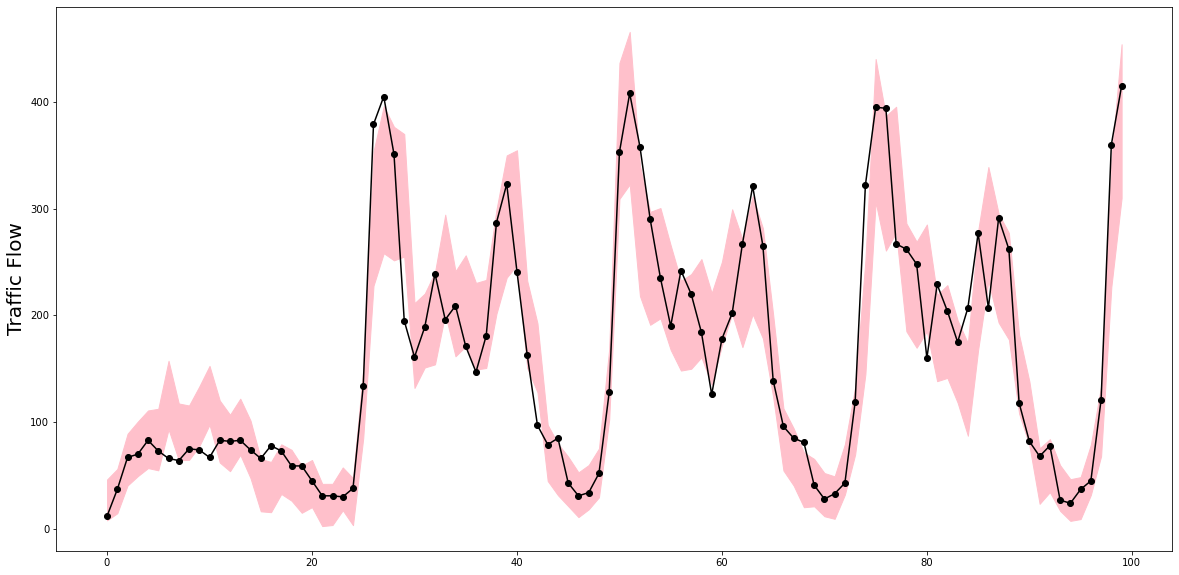

In [98]:
time = np.arange(100)
plt.figure(figsize=(20,10))
plt.fill_between(time, PIs_qra_xs[:100], PIs_qra_ys[:100], color="pink")
plt.plot(test_data[:100], marker="o", color="black")
plt.ylabel("Traffic Flow",fontsize=20)
plt.show()

In [99]:
PIs_qrlstm_xs = []
PIs_qrlstm_ys = []
for i in range(len(PIs_qrlstm)):
    PIs_qrlstm_xs.append(PIs_qrlstm[i][0])
    PIs_qrlstm_ys.append(PIs_qrlstm[i][1])

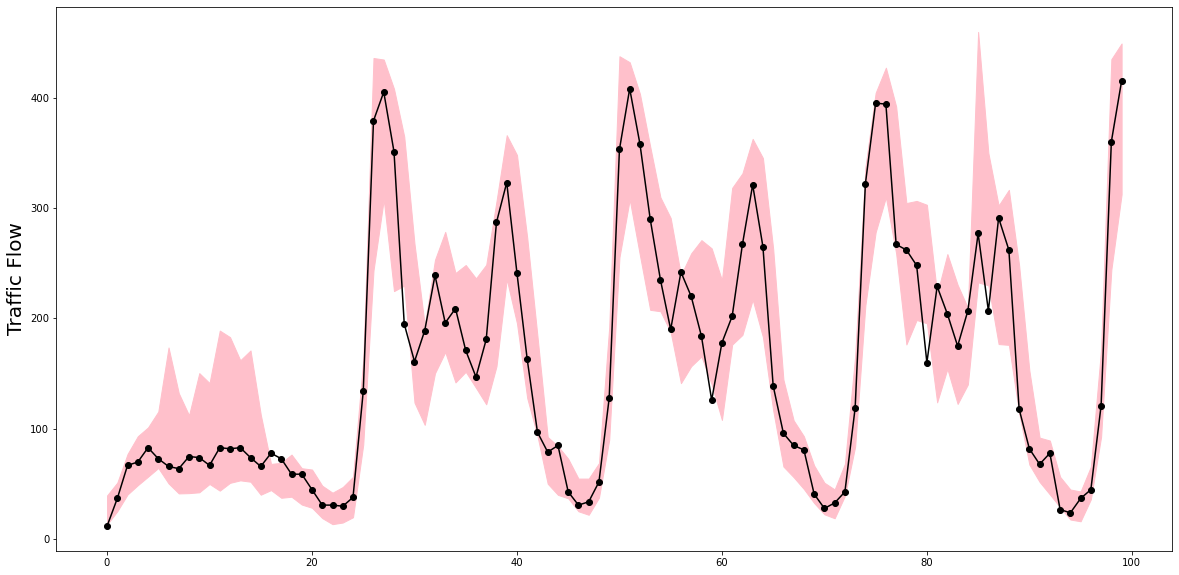

In [100]:
time = np.arange(100)
plt.figure(figsize=(20,10))
plt.fill_between(time, PIs_qrlstm_xs[:100], PIs_qrlstm_ys[:100], color="pink")
plt.plot(test_data[:100], marker="o", color="black")
plt.ylabel("Traffic Flow",fontsize=20)
plt.show()

# QRNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('data/istanbul/istanbul_data_mean_sdsh.csv')

In [3]:
#It is for SVR -----> SVRARIMA
data2 = data[['NUMBER_OF_VEHICLES']]
data3 = pd.DataFrame(data2.values)
data4 = pd.concat([data3.shift(169),data3.shift(168),data3.shift(167),data3.shift(25),data3.shift(24),data3.shift(23),data3.shift(2),data3.shift(1), data3], axis=1)
data4.columns = ['t-169','t-168','t-167','t-25','t-24','t-23','t-2','t-1', 't']
data4.tail(100)
X = data4.values
train_size = int(len(X) * 0.70)
data4

,t-169,t-168,t-167,t-25,t-24,t-23,t-2,t-1,t
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.000000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.0,105.000000
2,NaN,NaN,NaN,NaN,NaN,NaN,114.0,105.0,97.000000
3,NaN,NaN,NaN,NaN,NaN,NaN,105.0,97.0,63.000000
4,NaN,NaN,NaN,NaN,NaN,NaN,97.0,63.0,53.000000
...,...,...,...,...,...,...,...,...,...
11659,187.0,100.000000,91.000000,267.0,246.0,169.0,351.0,273.0,198.000000
11660,100.0,91.000000,88.000000,246.0,169.0,156.0,273.0,198.0,139.000000
11661,91.0,88.000000,106.000000,169.0,156.0,136.0,198.0,139.0,128.000000
11662,88.0,106.000000,146.793651,156.0,136.0,87.0,139.0,128.0,109.000000


In [4]:
sc = MinMaxScaler()
training_data = sc.fit_transform(X)

seq_length = 1
x, y = training_data[169:,:8], training_data[169:,-1]
print(x.shape)
print(y.shape)
train_size = 7995


dataX = Variable(torch.Tensor(np.array(x))).reshape((11495,8))
dataY = Variable(torch.Tensor(np.array(y))).reshape((11495,1))

trainX = Variable(torch.Tensor(np.array(x[0:train_size]))).reshape((7995,8))
trainY = Variable(torch.Tensor(np.array(y[0:train_size]))).reshape((7995,1))

testX = Variable(torch.Tensor(np.array(x[train_size:]))).reshape((3500,8))
testY = Variable(torch.Tensor(np.array(y[train_size:]))).reshape((3500,1))

print(dataX.shape)
print(dataY.shape)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(11495, 8)
(11495,)
torch.Size([11495, 8])
torch.Size([11495, 1])
torch.Size([7995, 8])
torch.Size([7995, 1])
torch.Size([3500, 8])
torch.Size([3500, 1])


In [5]:
class PinballLoss():
    def __init__(self, quantile=0.10, reduction='mean'):
        self.quantile = quantile
        assert 0 < self.quantile
        assert self.quantile < 1
        self.reduction = reduction
    def __call__(self, output, target):
        assert output.shape == target.shape
        loss = torch.zeros_like(target, dtype=torch.float)
        error = output - target 
        smaller_index = error < 0
        bigger_index = 0 < error
        loss[smaller_index] = self.quantile * (abs(error)[smaller_index])
        loss[bigger_index] = (1-self.quantile) * (abs(error)[bigger_index])
        
        if self.reduction == 'sum':
            loss = loss.sum()
        if self.reduction == 'mean':
            loss = loss.mean()
        return loss

In [10]:
class ANN(nn.Module):
   def __init__(self):
      super(ANN, self).__init__()
      self.fc1 = nn.Linear(8, 20)
      self.fc2 = nn.Linear(20, 1)
   def forward(self, x):
      x = F.tanh(self.fc1(x))
      x = F.sigmoid(self.fc2(x))
      return x



In [11]:
num_epochs = 2000
learning_rate = 0.01

ann = ANN()
print(ann)
criterion = PinballLoss(quantile=0.95)
optimizer = torch.optim.Adam(ann.parameters(), lr=learning_rate)
for epoch in range(num_epochs):
    outputs = ann(trainX)
    optimizer.zero_grad()
    loss = criterion(outputs, trainY)
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

ANN(
  (fc1): Linear(in_features=8, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=1, bias=True)
)
Epoch: 0, loss: 0.02970


/opt/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 100, loss: 0.00885
Epoch: 200, loss: 0.00728
Epoch: 300, loss: 0.00668
Epoch: 400, loss: 0.00640
Epoch: 500, loss: 0.00620
Epoch: 600, loss: 0.00609
Epoch: 700, loss: 0.00602
Epoch: 800, loss: 0.00599
Epoch: 900, loss: 0.00595
Epoch: 1000, loss: 0.00593
Epoch: 1100, loss: 0.00592
Epoch: 1200, loss: 0.00590
Epoch: 1300, loss: 0.00596
Epoch: 1400, loss: 0.00588
Epoch: 1500, loss: 0.00587
Epoch: 1600, loss: 0.00586
Epoch: 1700, loss: 0.00584
Epoch: 1800, loss: 0.00583
Epoch: 1900, loss: 0.00584


In [12]:
ann.eval()
test_predict = ann(testX)
print(test_predict.shape)

data_predict = test_predict.data.numpy()
dataY_plot = dataY.data.numpy()
print(data_predict.shape)
print(dataY_plot.shape)

d_p = np.concatenate((data_predict,data_predict,data_predict,data_predict,data_predict,data_predict,data_predict,data_predict,data_predict),axis=1)
dY_p = np.concatenate((dataY_plot,dataY_plot,dataY_plot,dataY_plot,dataY_plot,dataY_plot,dataY_plot,dataY_plot,dataY_plot),axis=1)
data_predict = sc.inverse_transform(d_p)
dataY_plot = sc.inverse_transform(dY_p)

dataY_plot = dataY_plot[:,0]
data_predict = data_predict[:,0]

torch.Size([3500, 1])
(3500, 1)
(11495, 1)


In [13]:
upper_bound = data_predict

In [14]:
num_epochs = 2000
learning_rate = 0.01

ann = ANN()
print(ann)
criterion = PinballLoss(quantile=0.05)
optimizer = torch.optim.Adam(ann.parameters(), lr=learning_rate)
for epoch in range(num_epochs):
    outputs = ann(trainX)
    optimizer.zero_grad()
    loss = criterion(outputs, trainY)
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

ANN(
  (fc1): Linear(in_features=8, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=1, bias=True)
)
Epoch: 0, loss: 0.18453


/opt/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/opt/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 100, loss: 0.01575
Epoch: 200, loss: 0.01555
Epoch: 300, loss: 0.01497
Epoch: 400, loss: 0.00757
Epoch: 500, loss: 0.00715
Epoch: 600, loss: 0.00687
Epoch: 700, loss: 0.00677
Epoch: 800, loss: 0.00671
Epoch: 900, loss: 0.00665
Epoch: 1000, loss: 0.00660
Epoch: 1100, loss: 0.00657
Epoch: 1200, loss: 0.00654
Epoch: 1300, loss: 0.00652
Epoch: 1400, loss: 0.00651
Epoch: 1500, loss: 0.00649
Epoch: 1600, loss: 0.00647
Epoch: 1700, loss: 0.00645
Epoch: 1800, loss: 0.00644
Epoch: 1900, loss: 0.00643


In [15]:
ann.eval()
test_predict = ann(testX)
print(test_predict.shape)

data_predict = test_predict.data.numpy()
dataY_plot = dataY.data.numpy()
print(data_predict.shape)
print(dataY_plot.shape)

d_p = np.concatenate((data_predict,data_predict,data_predict,data_predict,data_predict,data_predict,data_predict,data_predict,data_predict),axis=1)
dY_p = np.concatenate((dataY_plot,dataY_plot,dataY_plot,dataY_plot,dataY_plot,dataY_plot,dataY_plot,dataY_plot,dataY_plot),axis=1)
data_predict = sc.inverse_transform(d_p)
dataY_plot = sc.inverse_transform(dY_p)

dataY_plot = dataY_plot[:,0]
data_predict = data_predict[:,0]

torch.Size([3500, 1])
(3500, 1)
(11495, 1)


In [16]:
lower_bound = data_predict

In [17]:
def unconditional_coverage(PIs, data_test):
    indicator = []
    for i in range(len(PIs)):
        if PIs[i][0] < data_test[i] < PIs[i][1]:
            indicator.append(1)
        else:
            indicator.append(0)
    uc = np.sum(indicator)/len(indicator)
    return uc

def winlers_score(PIs, data_test, tau):
    data_test = np.array(data_test)
    indicators = []
    for i in range(len(PIs)):
        if PIs[i][0] < data_test[i] < PIs[i][1]:
            score = PIs[i][1]-PIs[i][0]
            indicators.append(score)
        elif data_test[i] < PIs[i][0]:
            score = (PIs[i][1]-PIs[i][0]) + (2 / tau * (PIs[i][0]-data_test[i]))
            indicators.append(score)
        elif PIs[i][1] < data_test[i]:
            score = (PIs[i][1]-PIs[i][0]) + (2 / tau * (data_test[i]-PIs[i][1]))
            indicators.append(score)
    ws = np.sum(np.array(indicators))/len(indicators)
    return ws

In [18]:
y_upper = np.array(upper_bound)
y_lower = np.array(lower_bound)

PIs_qrnn = []
for i in range(len(y_upper)):
    PIs_qrnn.append([y_lower[i], y_upper[i]])
test_data = dataY_plot[7995:]
len(test_data)
uc_qrnn = unconditional_coverage(PIs_qrnn, test_data)
print(uc_qrnn)
ws_qrnn= winlers_score(PIs_qrnn, test_data, tau=0.10)
print(ws_qrnn)

0.8871428571428571
141.93797275652204


In [59]:
pd.DataFrame(PIs_qrnn).to_csv("PIs/PIs_qrnn.csv")

In [19]:
PIs_qrnn_xs = []
PIs_qrnn_ys = []
for i in range(len(PIs_qrnn)):
    PIs_qrnn_xs.append(PIs_qrnn[i][0])
    PIs_qrnn_ys.append(PIs_qrnn[i][1])

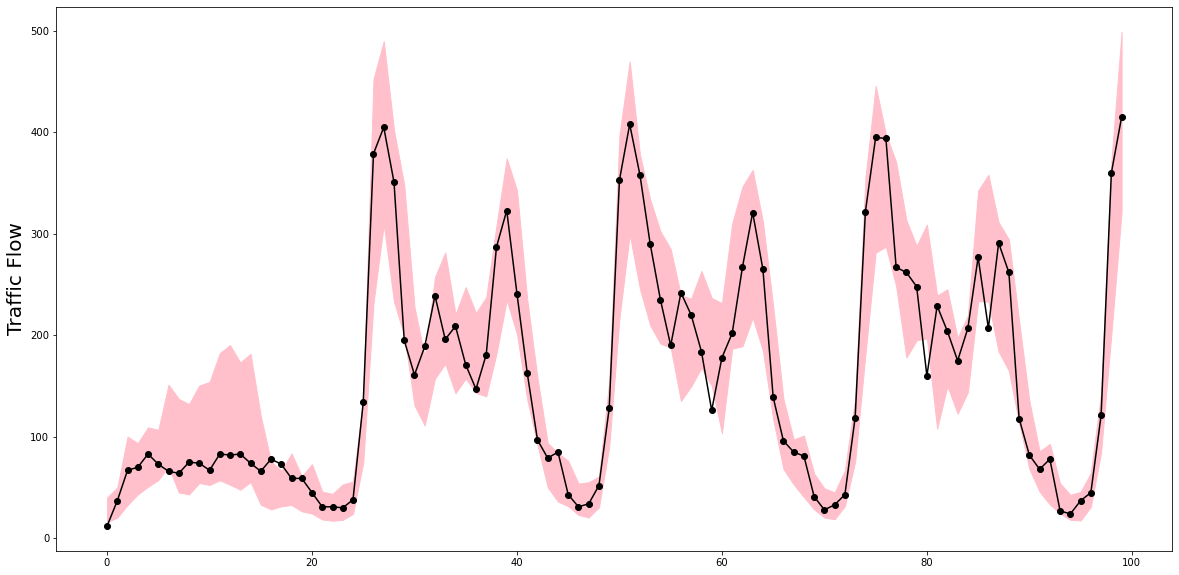

In [20]:
time = np.arange(100)
plt.figure(figsize=(20,10))
plt.fill_between(time, PIs_qrnn_xs[:100], PIs_qrnn_ys[:100], color="pink")
plt.plot(test_data[:100], marker="o", color="black")
plt.ylabel("Traffic Flow",fontsize=20)
plt.show()